# Linear Regression Model for Bike sharing demand predictions

In [1]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score, roc_curve
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
pd.options.mode.chained_assignment = None

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv('hour.csv')
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
data = data.rename(columns = {'dteday':'Date','yr': 'year', 'hr':'hour', 'mnth':'month','hum':'humidity', 'cnt':'count'})
data.head()

,instant,Date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
data.describe()

,instant,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
Date          17379 non-null object
season        17379 non-null int64
year          17379 non-null int64
month         17379 non-null int64
hour          17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
humidity      17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
count         17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
print ("Shape Of The Before Ouliers: ",data.shape)
data = data[np.abs(data["count"]-data["count"].mean())<=(3*data["count"].std())] 
print ("Shape Of The After Ouliers: ",data.shape)

('Shape Of The Before Ouliers: ', (17379, 17))
('Shape Of The After Ouliers: ', (17135, 17))


In [8]:
yLabels = data["count"]
yLabelsLog = np.log(yLabels)

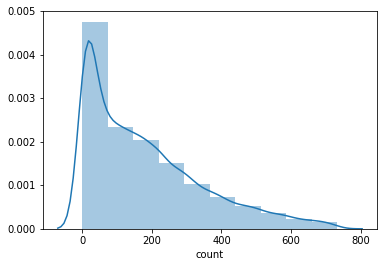

In [9]:
sns.distplot(yLabels, bins = 10)

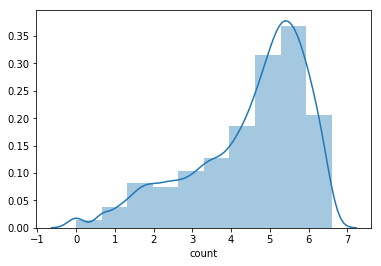

In [10]:
sns.distplot(yLabelsLog, bins = 10)

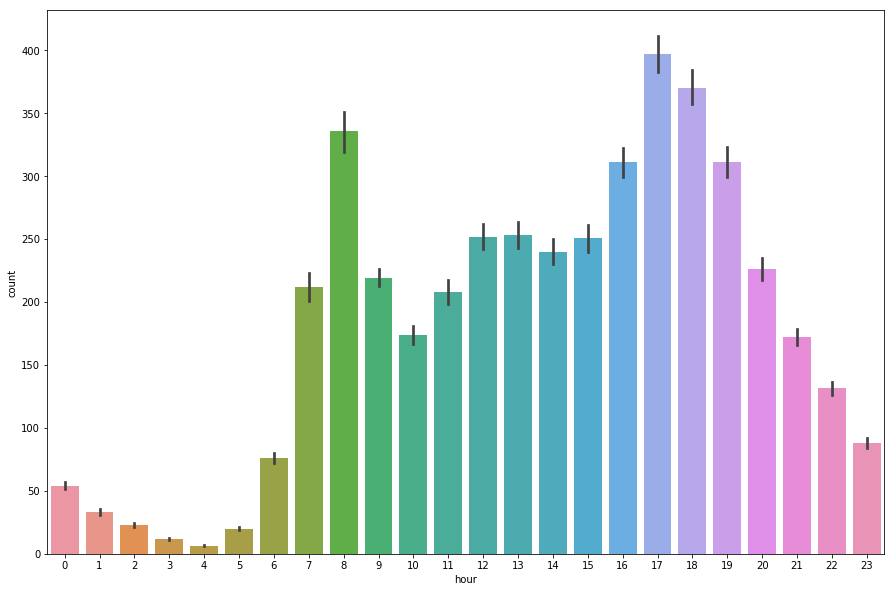

In [11]:
#This bar plot shows the most bikes are hired between 7 to 9 AM and 4 to 7 PM 
plt.figure(figsize=(15,10))
sns.barplot(x='hour',y = 'count' ,data = data)

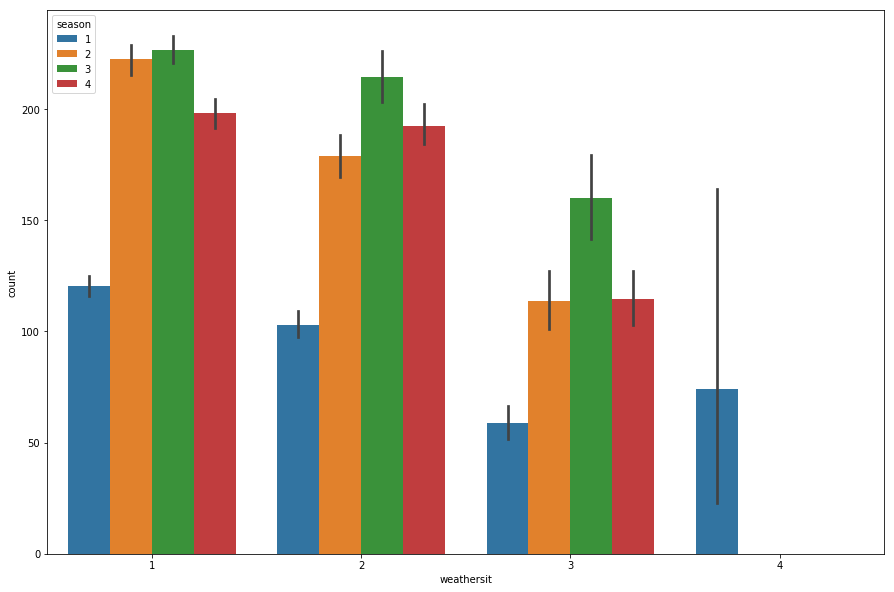

In [12]:
# on heavy rainy day(option 4 on weather sit the count of bikes rented has come down)
#since data doesnt have any data for season 2,3 and 4 ... the long line shows the outliers
plt.figure(figsize=(15,10))
sns.barplot(data=data,x= 'weathersit',y="count", hue = 'season')

In [13]:
# print(type(bike_data.Date.iloc[0]))
# bike_data.Date = bike_data.Date.apply(pd.to_datetime) 
# bike_data.head()
bike_data1 = data[['season','hour','count']]
bike_data1.head()

,season,hour,count
0,1,0,16
1,1,1,40
2,1,2,32
3,1,3,13
4,1,4,1


In [14]:
bike_datas1 = bike_data1[(bike_data1["season"] == 1)].groupby(['hour']).agg({"count" : "sum"})
bike_datas2 = bike_data1[(bike_data1["season"] == 2)].groupby(['hour']).agg({"count" : "sum"})
bike_datas3 = bike_data1[(bike_data1["season"] == 3)].groupby(['hour']).agg({"count" : "sum"})
bike_datas4 = bike_data1[(bike_data1["season"] == 4)].groupby(['hour']).agg({"count" : "sum"})
bike_datas4.head()

,count
hour,
0,9971
1,6322
2,4159
3,2052
4,1279


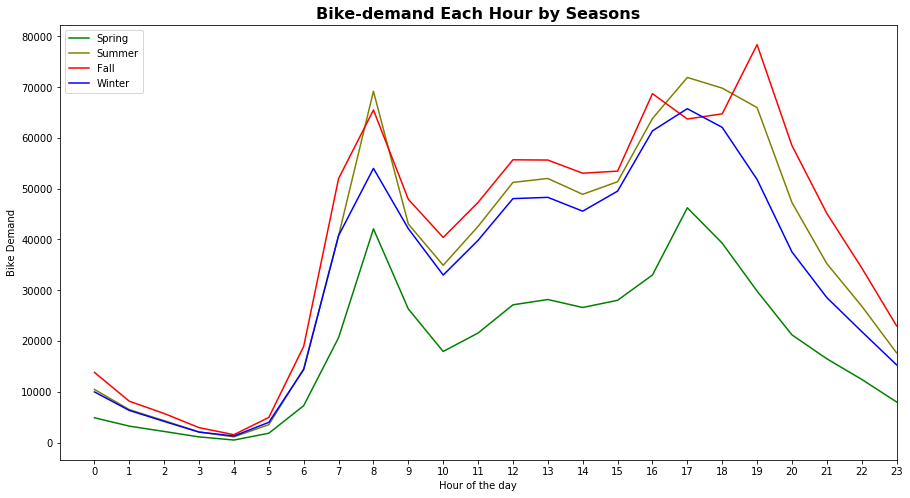

In [15]:
plt.figure(figsize=(15,8))
plt.plot(bike_datas1.index, bike_datas1.values, color = 'green', label = "Spring")
plt.plot(bike_datas2.index, bike_datas2.values, color = 'olive', label = "Summer")
plt.plot(bike_datas3.index, bike_datas3.values, color = 'red', label = "Fall")
plt.plot(bike_datas4.index, bike_datas4.values, color = 'blue', label = "Winter")
plt.legend(loc="upper left")
plt.title("Bike-demand Each Hour by Seasons", fontsize=16, fontweight='bold')
plt.xlabel("Hour of the day")
plt.ylabel("Bike Demand")
plt.xticks(np.arange(0,24, step = 1))
plt.xlim(-1,23)
plt.show()

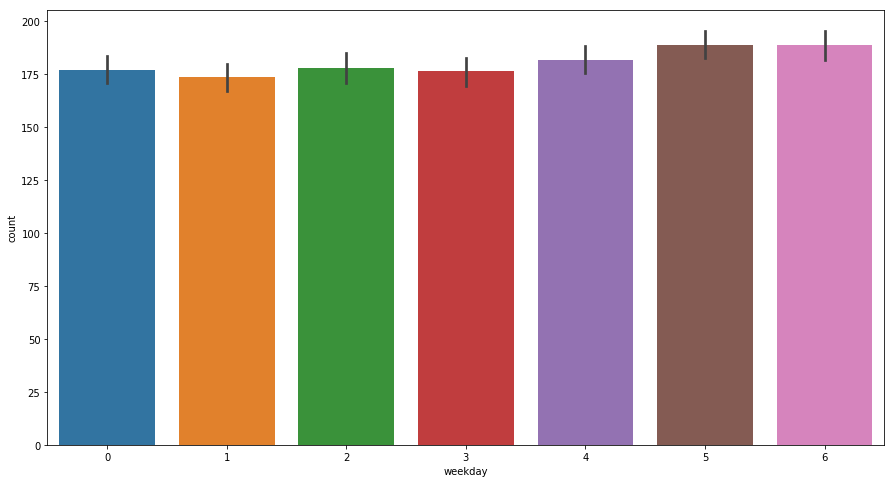

In [16]:
plt.figure(figsize=(15,8))
sns.barplot(x='weekday',y='count',data=data)

<Figure size 864x864 with 0 Axes>

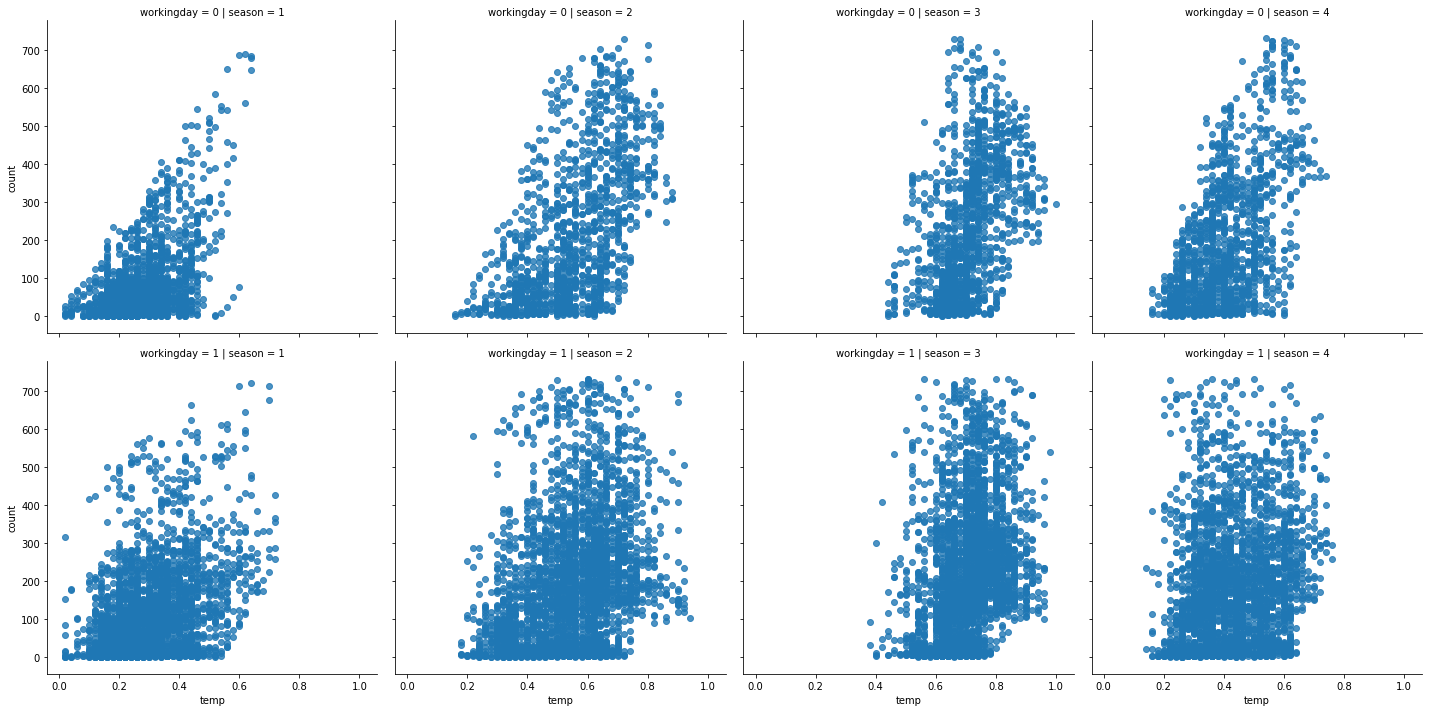

In [17]:
plt.figure(figsize=(12,12))
sns.lmplot('temp','count',row='workingday',col='season',data=data,fit_reg=False)

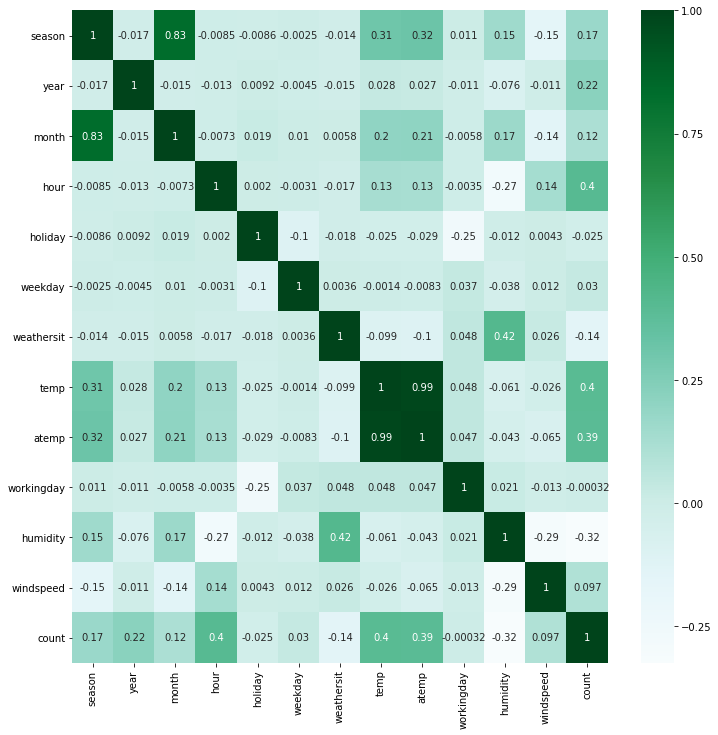

In [18]:
bike_datacorr = data[['season','year','month','hour','holiday','weekday','weathersit','temp','atemp','workingday','humidity','windspeed', 'count']]
plt.figure(figsize=(12,12))
sns.heatmap(bike_datacorr.corr(), annot=True, cmap ="BuGn")
##darker - highest correlation between data
##light - lowest correlation between data

In [19]:
#Looking at the above correlation matrix, we can remove weathersit, holiday
#splitting the data
from sklearn.model_selection import train_test_split
#X = data[['season','year','month','hour','weekday','temp','atemp','workingday','humidity']]
X = data[['season','year','month','hour','weekday','temp','atemp','humidity']]
y = data['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
regressor = LinearRegression(normalize=True)
regressor.fit(X_train, y_train)

/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [21]:
##predicting the test set results
y_pred = regressor.predict(X_test)
print(y_pred)

[192.04934045 120.69785328 111.06966171 ... 343.69215674 293.63421535
 241.20918687]


In [22]:
regressor.coef_

array([  56.24229212,   67.25957169,   -5.63536519,  165.963967  ,
         16.12012056,   36.01847555,  250.66848063, -197.16717688])

In [23]:
##Finding out the intercept
print(regressor.intercept_)

16.909042744024333


Text(0,0.5,'Predicted Values')

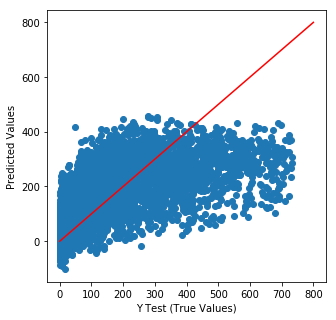

In [24]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred)
plt.plot( [0,800],[0,800], color='red')
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')

In [25]:
from sklearn import metrics
print('MAE= ', metrics.mean_absolute_error(y_test,y_pred))
print('MSE= ', metrics.mean_squared_error(y_test,y_pred)) ## looks high
print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

('MAE= ', 98.31128466278135)
('MSE= ', 17301.414889432835)
('RMS= ', 131.5348428722703)


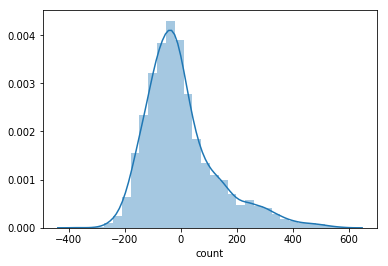

In [26]:
sns.distplot((y_test-y_pred),bins=30)

In [27]:
#how good our model is
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.3816285267072691

If r2_score is more than 0.9, the LR model is considered to be a good model. Since our r-squared value is 
around 0.4, it shows our model is not valid for the bike demand predictions. 

In [28]:
#Root Mean Squared Logarithmic Error
def rmsle(prediction, actual):
    log1 = np.array([np.log(v + 1) for v in prediction])
    log2 = np.array([np.log(v + 1) for v in actual])
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [29]:
rfModel = RandomForestRegressor(n_estimators=200) 

rfModel.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

('RMSLE: ', 0.18339542674302564)
Mean squared error: 341.43
Variance score: 0.99


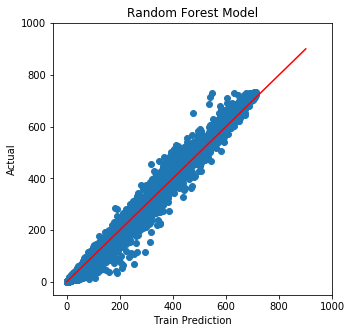

In [30]:
train_prediction = rfModel.predict(X_train)
plt.figure(figsize=(5, 5))
plt.scatter(train_prediction, y_train)
plt.plot( [0,900],[0,900], color='red')
plt.xlim(-50, 1000)
plt.ylim(-50, 1000)
plt.xlabel('Train Prediction')
plt.ylabel('Actual')
plt.title('Random Forest Model')
print("RMSLE: ", rmsle(train_prediction, y_train))
print("Mean squared error: %.2f"
      % mean_squared_error(train_prediction, y_train))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(train_prediction, y_train))

The model predicts good for the train data so lets try now with test data and check the accuracy

In [31]:
#rfModel.fit(trainx,trainy)
prediction = rfModel.predict(X_test)

('RMSLE: ', 0.4020830439831441)
Mean squared error: 2520.97
Variance score: 0.90


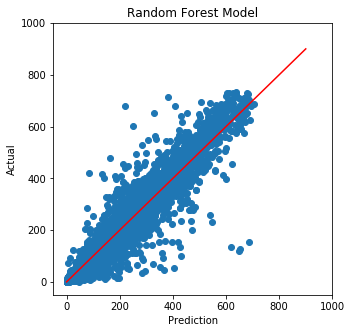

In [32]:
plt.figure(figsize=(5, 5))
plt.scatter(prediction, y_test)
plt.plot( [0,900],[0,900], color='red')
plt.xlim(-50, 1000)
plt.ylim(-50, 1000)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Random Forest Model')
print("RMSLE: ", rmsle(prediction, y_test))
print("Mean squared error: %.2f"
      % mean_squared_error(prediction, y_test))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(prediction, y_test))

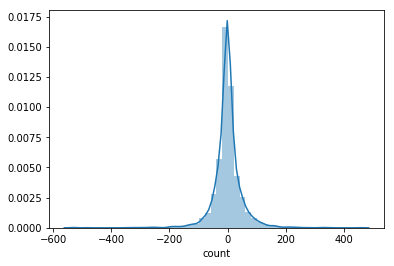

In [33]:
sns.distplot((y_test-prediction))